In [ ]:
# Задача
# 1. Сгенерируйте набор данных для предсказания временных последовательностей. Выполните тренировку RNN
# 2. Модифицируйте сеть, используя в качестве рекуррентного слоя LSTM слой библиотеки pytorch.
# https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html

# 3. решите задачу набора данных лекции 7.

Шаг: 0, Потеря: 9.7528


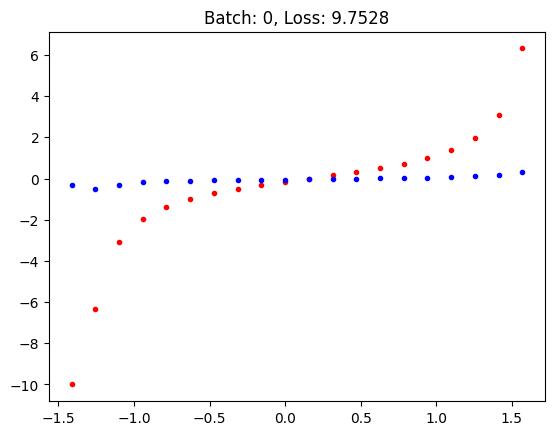

Шаг: 10, Потеря: 3.3122


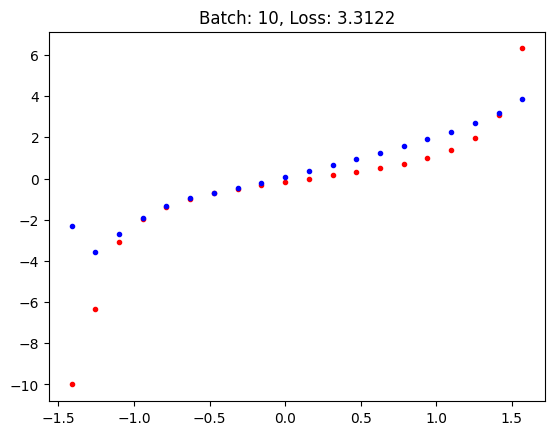

Шаг: 20, Потеря: 1.4062


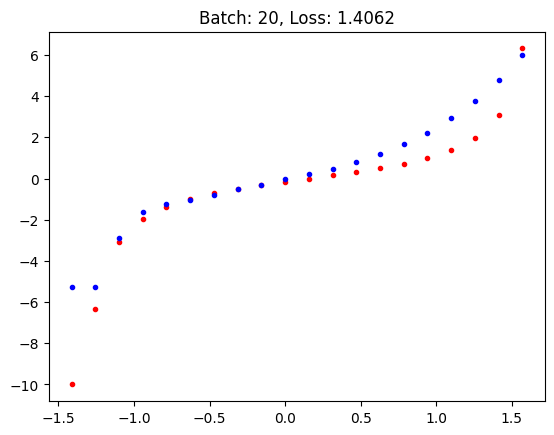

Шаг: 30, Потеря: 0.5833


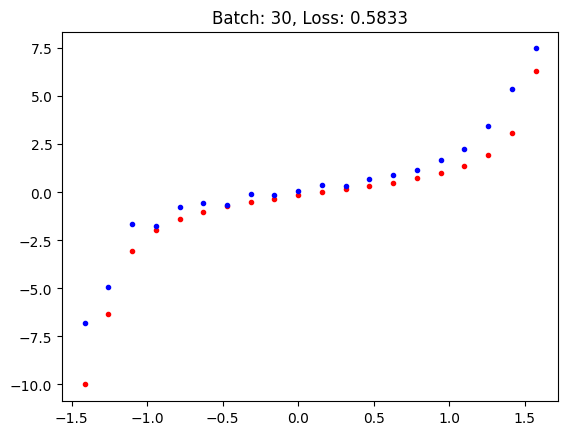

Шаг: 40, Потеря: 0.1701


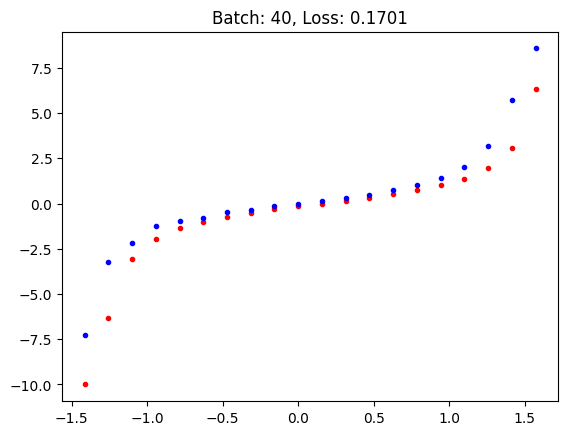

Шаг: 50, Потеря: 0.0636


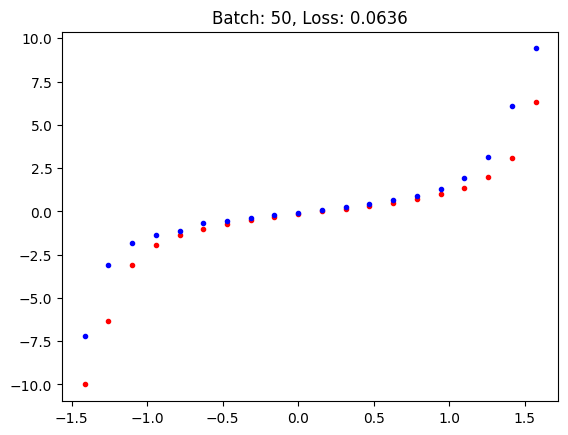

Шаг: 60, Потеря: 0.0092


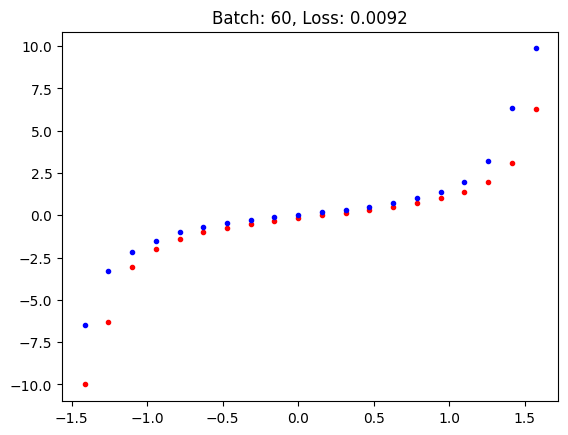

Шаг: 70, Потеря: 0.0052


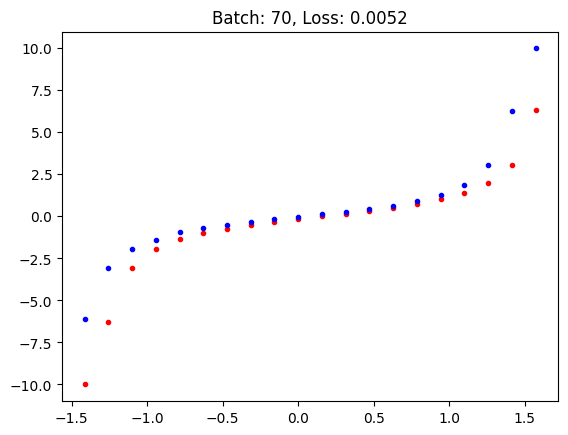

Шаг: 80, Потеря: 0.0016


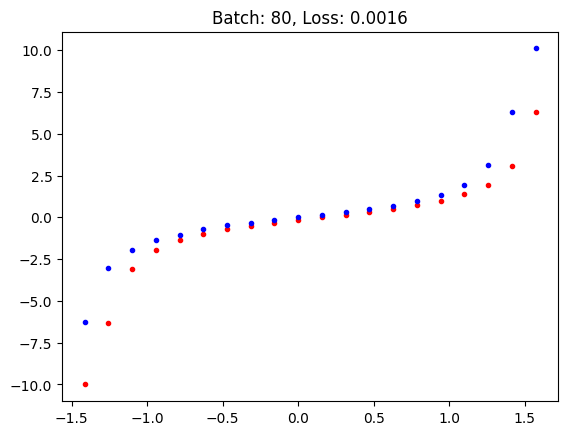

Шаг: 90, Потеря: 0.0016


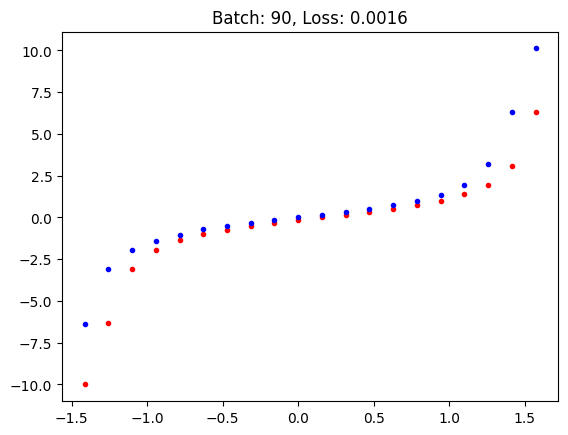

In [11]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

seq_length = 20
n_steps = 100
print_every = 10

class RNN(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim, n_layers):
        super(RNN, self).__init__()
        self.hidden_dim = hidden_dim
        self.rnn = nn.RNN(input_size, hidden_dim, n_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_size)

    def forward(self, x, hidden):
        batch_size = x.size(0)
        r_out, hidden = self.rnn(x, hidden)
        r_out = r_out.view(-1, self.hidden_dim)  
        output = self.fc(r_out)
        return output, hidden

input_size = 1
output_size = 1
hidden_dim = 32
n_layers = 1

rnn = RNN(input_size, output_size, hidden_dim, n_layers)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(rnn.parameters(), lr=0.01)

def train(rnn, n_steps, print_every):
    hidden = None
    for batch_i in range(n_steps):
        time_steps = np.linspace(-np.pi/2, np.pi/2, seq_length + 1)
        data = np.tan(time_steps)
        data = np.clip(data, -10, 10)

        data.resize((seq_length + 1, 1))
        x = data[:-1]
        y = data[1:]

        x_tensor = torch.Tensor(x).unsqueeze(0)
        y_tensor = torch.Tensor(y)

        prediction, hidden = rnn(x_tensor, hidden)
        hidden = hidden.data

        loss = criterion(prediction, y_tensor)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_i % print_every == 0:
            print('Шаг: {}, Потеря: {:.4f}'.format(batch_i, loss.item()))
            plt.plot(time_steps[1:], x, 'r.')
            plt.plot(time_steps[1:], prediction.data.numpy().flatten(), 'b.')
            plt.title(f'Batch: {batch_i}, Loss: {loss.item():.4f}')
            plt.show()

trained_rnn = train(rnn, n_steps, print_every)

Шаг: 0, Потеря: 11.0311


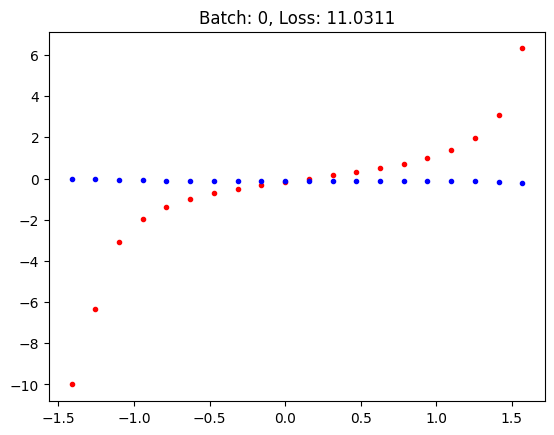

Шаг: 10, Потеря: 5.5242


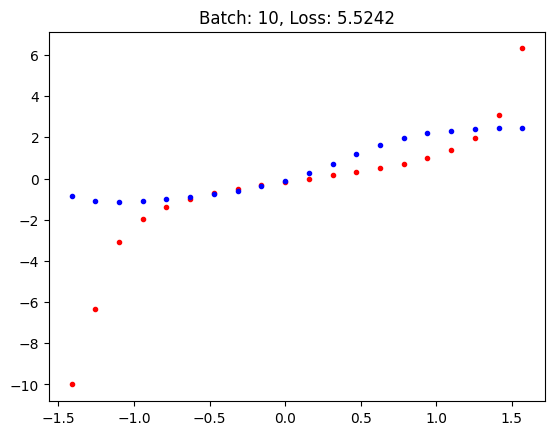

Шаг: 20, Потеря: 2.6579


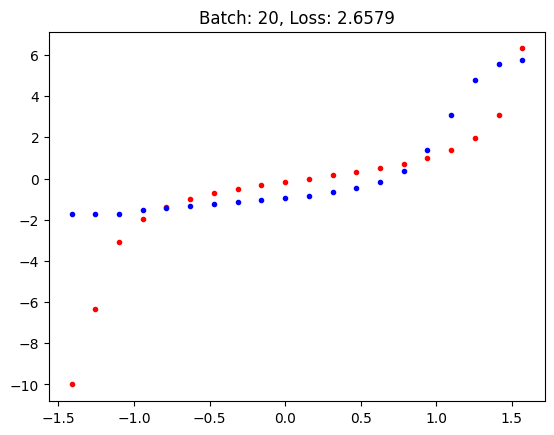

Шаг: 30, Потеря: 1.2516


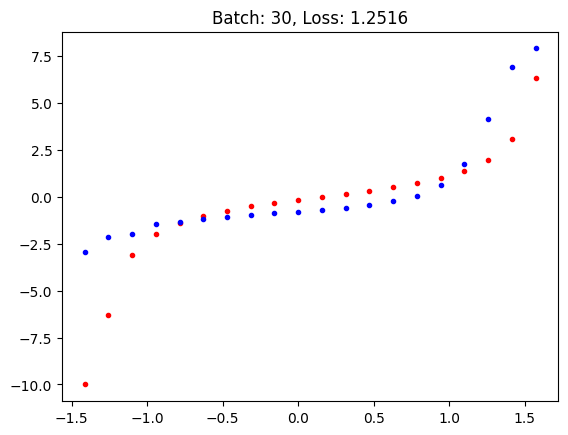

Шаг: 40, Потеря: 0.3709


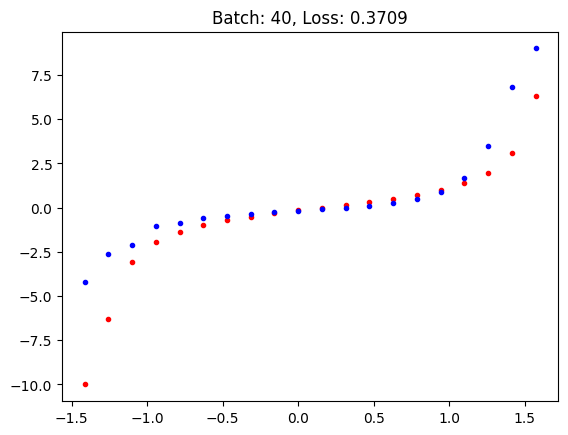

Шаг: 50, Потеря: 0.2622


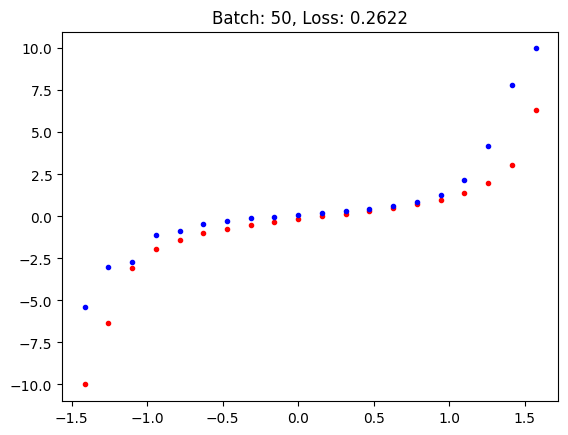

Шаг: 60, Потеря: 0.0925


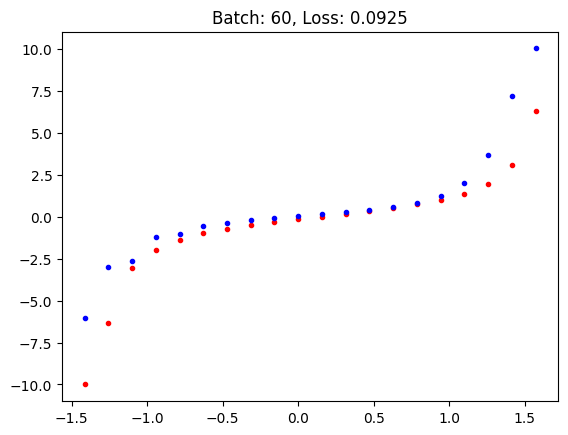

Шаг: 70, Потеря: 0.0442


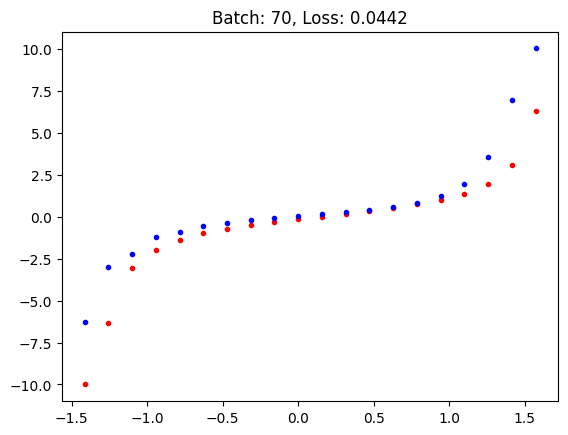

Шаг: 80, Потеря: 0.0183


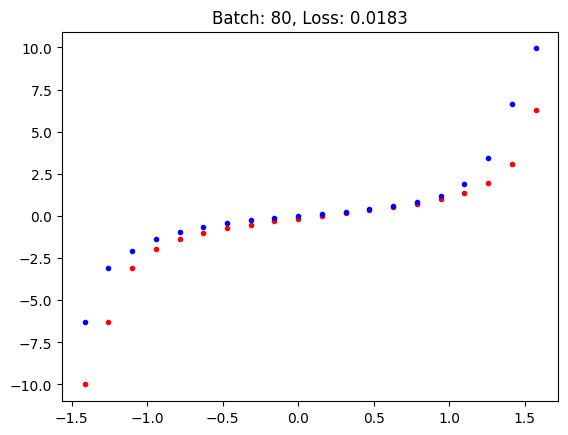

Шаг: 90, Потеря: 0.0100


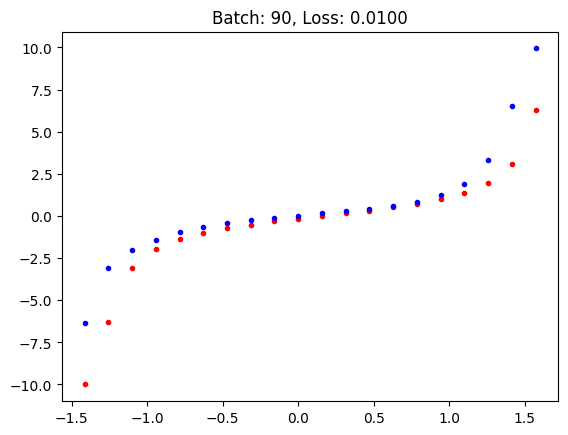

In [3]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

seq_length = 20
n_steps = 100
print_every = 10

class LSTM(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim, n_layers):
        super(LSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.lstm = nn.LSTM(input_size, hidden_dim, n_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_size)

    def forward(self, x, hidden):
        lstm_out, hidden = self.lstm(x, hidden)
        lstm_out = lstm_out.view(-1, self.hidden_dim)  
        output = self.fc(lstm_out)
        return output, hidden

input_size = 1
output_size = 1
hidden_dim = 32
n_layers = 1

lstm = LSTM(input_size, output_size, hidden_dim, n_layers)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(lstm.parameters(), lr=0.01)

def train(lstm, n_steps, print_every):
    
    for batch_i in range(n_steps):
        time_steps = np.linspace(-np.pi/2, np.pi/2, seq_length + 1)
        data = np.tan(time_steps)
        data = np.clip(data, -10, 10)

        data.resize((seq_length + 1, 1))
        x = data[:-1]
        y = data[1:]

        x_tensor = torch.Tensor(x).unsqueeze(0)
        y_tensor = torch.Tensor(y)

        hidden = (torch.zeros(n_layers, 1, hidden_dim), torch.zeros(n_layers, 1, hidden_dim))

        prediction, hidden = lstm(x_tensor, hidden)

        loss = criterion(prediction, y_tensor)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_i % print_every == 0:
            print('Шаг: {}, Потеря: {:.4f}'.format(batch_i, loss.item()))
            plt.plot(time_steps[1:], x, 'r.')
            plt.plot(time_steps[1:], prediction.data.numpy().flatten(), 'b.')
            plt.title(f'Batch: {batch_i}, Loss: {loss.item():.4f}')
            plt.show()

trained_lstm = train(lstm, n_steps, print_every)

Столбец: HUFL, Шаг: 0, Потеря: 0.4868
Столбец: HUFL, Шаг: 20, Потеря: 0.0225
Столбец: HUFL, Шаг: 40, Потеря: 0.0127
Столбец: HUFL, Шаг: 60, Потеря: 0.0092
Столбец: HUFL, Шаг: 80, Потеря: 0.0077
Столбец: HUFL, Шаг: 100, Потеря: 0.0065
Столбец: HUFL, Шаг: 120, Потеря: 0.0059
Столбец: HUFL, Шаг: 140, Потеря: 0.0052
Столбец: HUFL, Шаг: 160, Потеря: 0.0049
Столбец: HUFL, Шаг: 180, Потеря: 0.0045
Предсказания для столбца "HUFL":
[ 5.08065897  4.90793928  3.13296467 ... -0.57591711  2.55846084
 10.72861412]


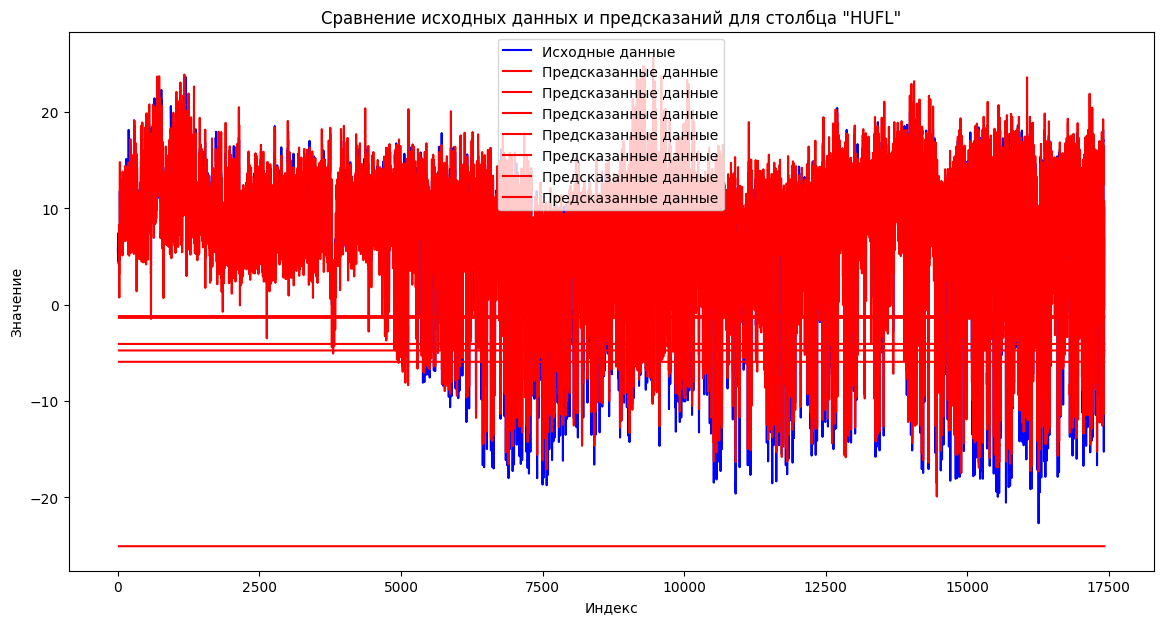

Столбец: HULL, Шаг: 0, Потеря: 0.1857
Столбец: HULL, Шаг: 20, Потеря: 0.0169
Столбец: HULL, Шаг: 40, Потеря: 0.0068
Столбец: HULL, Шаг: 60, Потеря: 0.0043
Столбец: HULL, Шаг: 80, Потеря: 0.0036
Столбец: HULL, Шаг: 100, Потеря: 0.0033
Столбец: HULL, Шаг: 120, Потеря: 0.0031
Столбец: HULL, Шаг: 140, Потеря: 0.0030
Столбец: HULL, Шаг: 160, Потеря: 0.0030
Столбец: HULL, Шаг: 180, Потеря: 0.0029
Предсказания для столбца "HULL":
[1.2147122  1.34961363 1.00386483 ... 6.16698982 5.96027265 4.12915772]


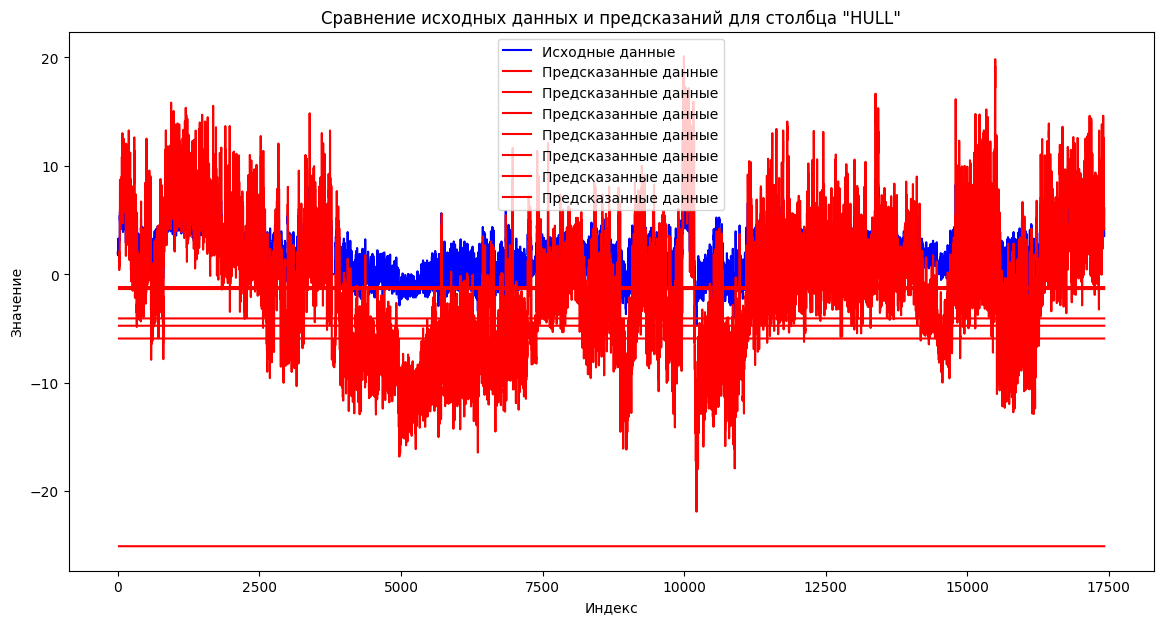

In [15]:
import torch
from torch import nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv('ETTh1.csv')
data['date'] = pd.to_datetime(data['date'])
data.drop(columns=['date'], inplace=True)

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data.values)

seq_length = 20
n_steps = 200 
input_size = 1
hidden_dim = 64 
n_layers = 1

def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(len(data) - seq_length):
        x.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(x), np.array(y)

class LSTM(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim, n_layers):
        super(LSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_dim, n_layers, batch_first=True)
        self.fc1 = nn.Linear(hidden_dim, hidden_dim * 2)
        self.bn1 = nn.BatchNorm1d(hidden_dim * 2) 
        self.fc2 = nn.Linear(hidden_dim * 2, hidden_dim)
        self.bn2 = nn.BatchNorm1d(hidden_dim) 
        self.fc3 = nn.Linear(hidden_dim, output_size)
        self.dropout = nn.Dropout(0.2) 

    def forward(self, x, hidden):
        lstm_out, hidden = self.lstm(x, hidden)
        output = self.fc1(lstm_out[:, -1, :])
        output = self.bn1(output)
        output = torch.relu(output)
        output = self.fc2(output)
        output = self.bn2(output)
        output = torch.relu(output)
        output = self.dropout(output) 
        output = self.fc3(output)
        return output, hidden

predictions = []

for col in range(scaled_data.shape[1]):
    column_data = scaled_data[:, col].reshape(-1, 1)
    X, y = create_sequences(column_data, seq_length)

    X_tensor = torch.Tensor(X)
    y_tensor = torch.Tensor(y)

    lstm = LSTM(input_size, 1, hidden_dim, n_layers)
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(lstm.parameters(), lr=0.01)

    def train_lstm(lstm, X, y, n_steps):
        lstm.train()
        for step in range(n_steps):
            h_state = (torch.zeros(n_layers, X.size(0), hidden_dim),
                       torch.zeros(n_layers, X.size(0), hidden_dim))

            prediction, h_state = lstm(X, h_state)
            loss = criterion(prediction, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            if step % 20 == 0:
                print(f'Столбец: {data.columns[col]}, Шаг: {step}, Потеря: {loss.item():.4f}')

    train_lstm(lstm, X_tensor, y_tensor.view(-1, 1), n_steps)

    with torch.no_grad():
        h_state = (torch.zeros(n_layers, X_tensor.size(0), hidden_dim),
                   torch.zeros(n_layers, X_tensor.size(0), hidden_dim))

        X_tensor_reshaped = X_tensor.view(X_tensor.size(0), seq_length, input_size)
        prediction, _ = lstm(X_tensor_reshaped, h_state)
        predictions.append(prediction.numpy())

    inverse_transform_data = np.zeros((prediction.numpy().shape[0], data.shape[1]))
    inverse_transform_data[:, 0] = prediction.numpy().flatten()

    predicted_values = scaler.inverse_transform(inverse_transform_data)

    print(f'Предсказания для столбца "{data.columns[col]}":')
    print(predicted_values[:, 0])

    if col < 2:
        original_data = data.iloc[:, col].values
        x = np.arange(len(original_data))

        plt.figure(figsize=(14, 7))
        plt.plot(x, original_data, label='Исходные данные', color='blue')
        plt.plot(x[len(x) - len(predicted_values):], predicted_values, label='Предсказанные данные', color='red')

        plt.title(f'Сравнение исходных данных и предсказаний для столбца "{data.columns[col]}"')
        plt.xlabel('Индекс')
        plt.ylabel('Значение')
        plt.legend()
        plt.show()

    if col == 1:
        break